Basic scatter plot of data


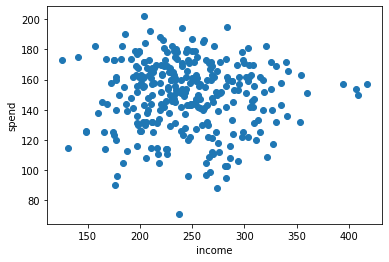

Basic KMeans clustering


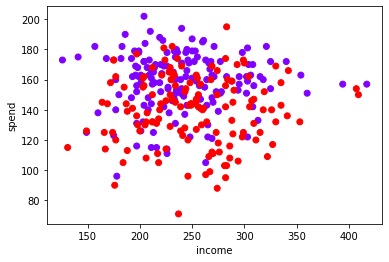

Stronger KMeans clustering


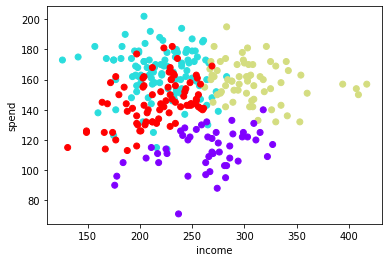

In [15]:
# Joshua Sweet and Henry Unruh

# Problem 1
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

print("Basic scatter plot of data")
data = pd.read_csv('data.csv')
data

plt.scatter(data['INCOME'],data['SPEND'])
plt.xlabel('income')
plt.ylabel('spend')
plt.show()

print("Basic KMeans clustering")
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
plt.scatter(clusters['INCOME'], clusters['SPEND'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('income')
plt.ylabel('spend')
plt.show()

print("Stronger KMeans clustering")
x_scaled = preprocessing.scale(x)
x_scaled
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters_pred']=kmeans_new.fit_predict(x_scaled)
clusters_new

plt.scatter(clusters_new['INCOME'], clusters_new['SPEND'], c = clusters_new['clusters_pred'], cmap = 'rainbow')
plt.xlabel('income')
plt.ylabel('spend')
plt.show()

C:\Users\proje\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


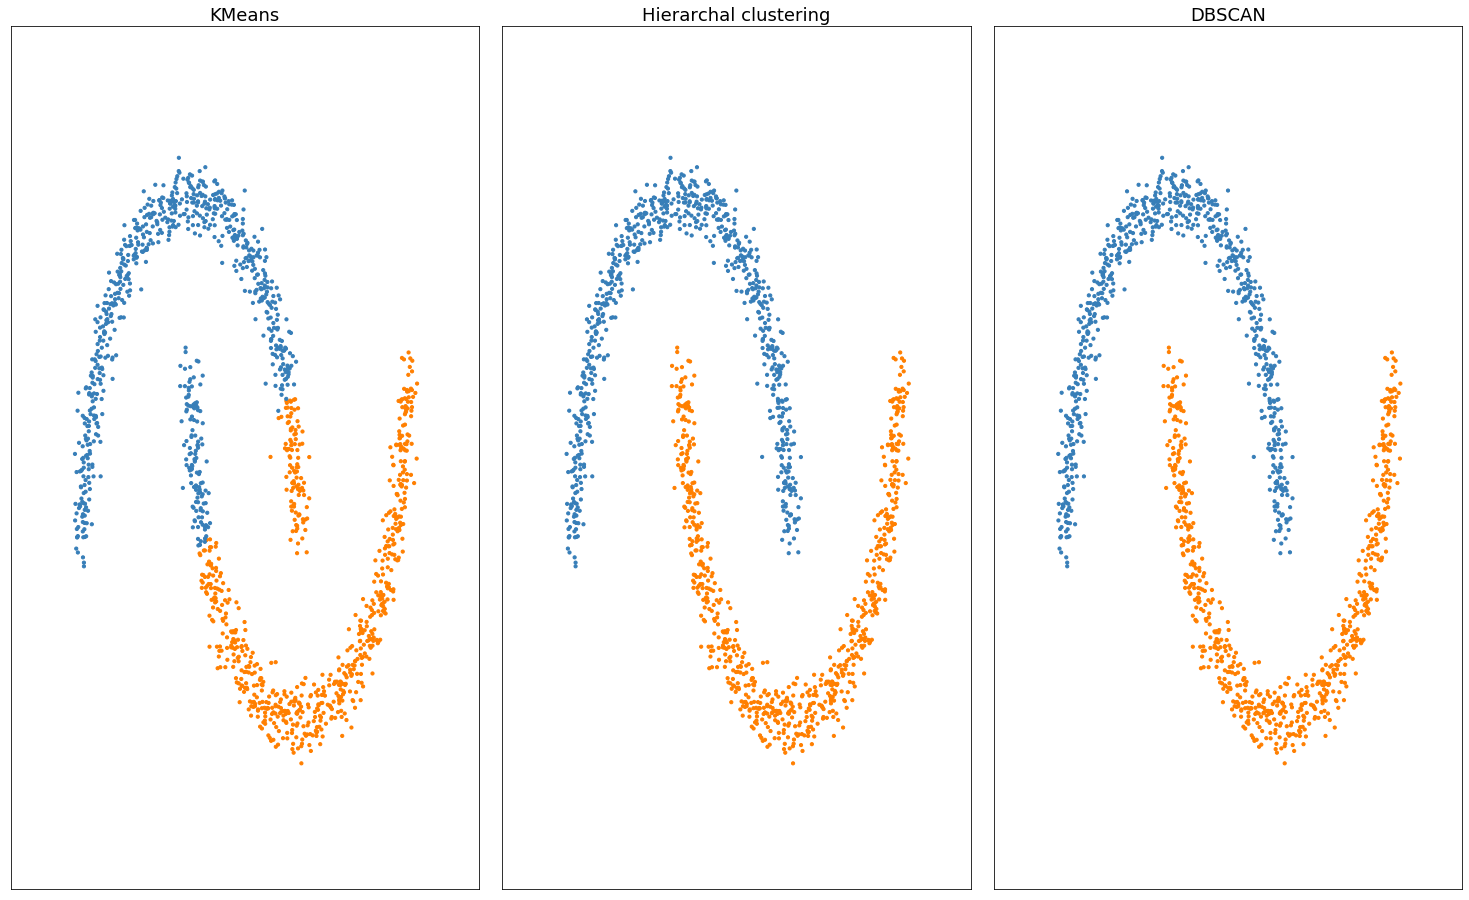

In [31]:
# Problem 2
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    dbscan = cluster.DBSCAN(eps=params['eps'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    
    clustering_algorithms = (
        ('KMeans', two_means),
        ('Hierarchal clustering', average_linkage),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

In [21]:
# Problem 3
import cv2
import numpy as np
cap = cv2.VideoCapture (0)
width = int(cap.get(3))
height = int(cap.get(4))

videoWriter = cv2.VideoWriter ("video.avi", -1, 24, (width, height))
return1, frame1 = cap.read ()
return2, frame2 = cap.read ()

while True:
    frame1Gray = cv2.cvtColor (frame1, cv2.COLOR_BGR2GRAY)
    frame2Gray = cv2.cvtColor (frame2, cv2.COLOR_BGR2GRAY)
    frame1Blur = cv2.GaussianBlur (frame1Gray, (21, 21), 0)
    frame2Blur = cv2.GaussianBlur (frame2Gray, (21, 21), 0)
    
    diff = cv2.absdiff (frame1Blur, frame2Blur)
    
    thresh = cv2.threshold (diff, 20, 255, cv2.THRESH_BINARY)[1]
    
    final = cv2.dilate (thresh, None, iterations = 2)
    
    masked = cv2.bitwise_and (frame1, frame1, mask = thresh)
    
    whitePixels = np.sum (thresh) / 255
    rows, cols = thresh.shape
    total = rows * cols
    
    if whitePixels > 0.001 * total:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText (masked, "Motion Detected", (10, 50), font, 1,
                    (0, 0, 255), 2, cv2.LINE_AA)
        
    cv2.imshow ("Motion", masked)
    videoWriter.write (masked)
    
    frame1 = frame2
    ret, frame2 = cap.read ()
    
    if not ret:
        break;
    key = cv2.waitKey (10)
    if key == 27:
        break

videoWriter.release ()
cap.release ()
cv2.destroyAllWindows ()

Faces found:  5


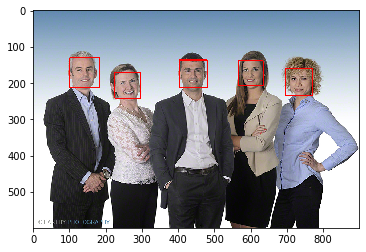

In [33]:
# Problem 4
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fileList = {"image.jpg"}

for file in fileList:
    #Loading the image to be tested
    test_image = cv2.imread(file)

    #Converting to grayscale
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

    # Displaying the grayscale image
    plt.imshow(test_image_gray, cmap = "gray")

    haar_cascade_face = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);



    # Let us print the no. of faces found
    print('Faces found: ', len(faces_rects))


    for (x,y,w,h) in faces_rects:
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
    plt.imshow(convertToRGB(test_image))
    plt.show ()